# Add Observability to Onnxruntime by HiQ

The following main.py code is from Pytorch's official website [Example: AlexNet from PyTorch to ONNX](https://pytorch.org/docs/stable/onnx.html#example-alexnet-from-pytorch-to-onnx)

In [1]:
!cat main.py

import os
import onnxruntime as ort
import numpy as np

here = os.path.dirname(os.path.realpath(__file__))

def main():
    if not os.path.exists(f"{here}/alexnet.onnx"):
        import torch
        import torchvision

        dummy_input = torch.randn(10, 3, 224, 224, device="cpu")
        model = torchvision.models.alexnet(pretrained=True)
        input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
        output_names = [ "output1" ]
        _ = torch.onnx.export(model,
                        dummy_input,
                        f"{here}/alexnet.onnx",
                        verbose=True,
                        input_names=input_names,
                        output_names=output_names)
    ort_session = ort.InferenceSession(f"{here}/alexnet.onnx")
    for _ in range(3):
        _ = ort_session.run(
            None,
            {"actual_input_1": np.random.randn(10, 3, 224, 224).astype(np.float32)},
        )

if __name__ == "__main__":
    main()


In [2]:
import hiq
from hiq.framework.onnxruntime import OrtHiQLatency

driver = OrtHiQLatency()
hiq.mod("main").main()
driver.show()

[2022-04-10 00:40:52.828551 - 00:40:53.697346]  [100.00%] 🟢_root_time(0.8688)
                                                            [OH:515us]
[2022-04-10 00:40:52.828551 - 00:40:53.418799]  [ 67.94%]    |_ort_session(0.5902)
[2022-04-10 00:40:52.828612 - 00:40:52.828631]  [  0.00%]    |  |___sess_init(0.0000)
[2022-04-10 00:40:52.828677 - 00:40:53.418749]  [ 67.92%]    |  l___create_inference_session(0.5901)
[2022-04-10 00:40:53.459990 - 00:40:53.511735]  [  5.96%]    |___ort_run(0.0517)
[2022-04-10 00:40:53.552193 - 00:40:53.603802]  [  5.94%]    |___ort_run(0.0516)
[2022-04-10 00:40:53.644486 - 00:40:53.697346]  [  6.08%]    l___ort_run(0.0529)



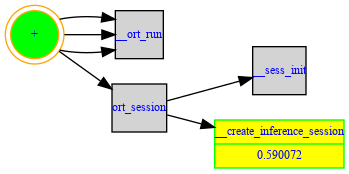

In [3]:
from hiq import KEY_LATENCY
from IPython.display import Image
t = driver.get_metrics(metrics_key=KEY_LATENCY)[0]
Image(t.to_img())


'/tmp/tim_cm7m5zbh03bl.png'

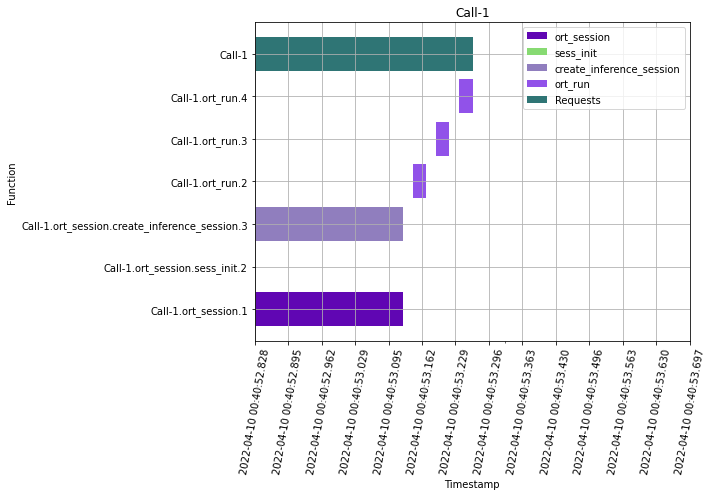

In [4]:
from hiq.utils import create_gantt_chart_time
create_gantt_chart_time(t.repr())